# **Flight Price Analysis**

In [10]:
# Import The required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
#import hvplot.pandas

# Import API key
#from api_keys import geoapify_key

# **Dataframe**

In [11]:
#Create airport dataframe
flight_df = pd.read_csv('Resources/Clean_Dataset.csv')

#Display sample Data
flight_df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price_INR,price_USD
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,71.44
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,71.44
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,71.47
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,71.46
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,71.46


# **Which Airlines company's average fare is the Highest and lowest?**

In [12]:
# Airlines Price Average
average_fare = flight_df.groupby("airline")["price_USD"].mean()
highest_average_fare = average_fare.idxmax()
lowest_average_fare = average_fare.idxmin()
print(f"The airline company with the highest average fare: {highest_average_fare}")
print(f"The airline company with the lowest average fare: {lowest_average_fare}")

The airline company with the highest average fare: Vistara
The airline company with the lowest average fare: AirAsia


In [13]:
#map of the airline destination

# **Bar Graph for each airline**

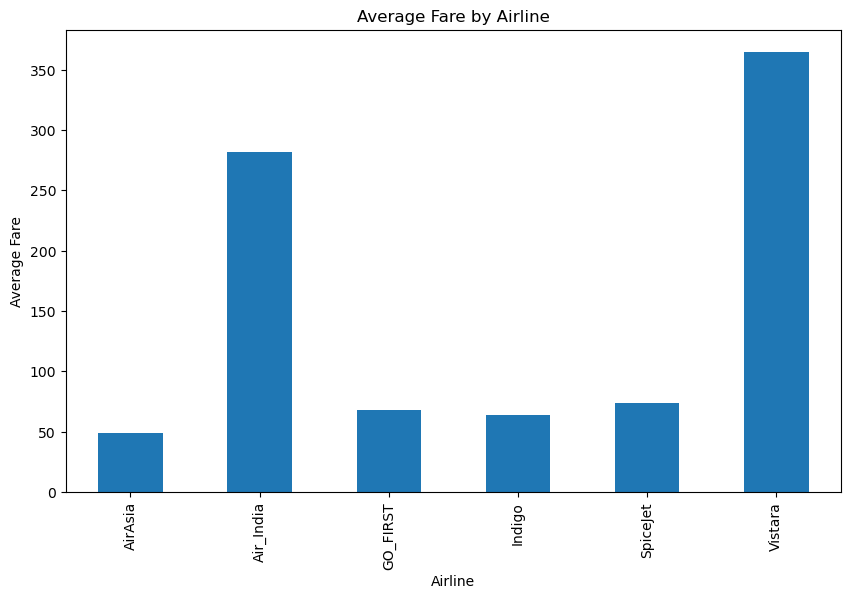

In [14]:
# Bar Plot
average_fare.plot(kind="bar", figsize=(10, 6))
plt.title("Average Fare by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Fare")
plt.show()

In [15]:
# Filter the DataFrame for tickets bought all days before departure
Days_Departure_df = flight_df[flight_df['days_left'] <= 49]
Days_Departure_df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price_INR,price_USD
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,71.44
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,71.44
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,71.47
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,71.46
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,71.46


# **Take average for each day**

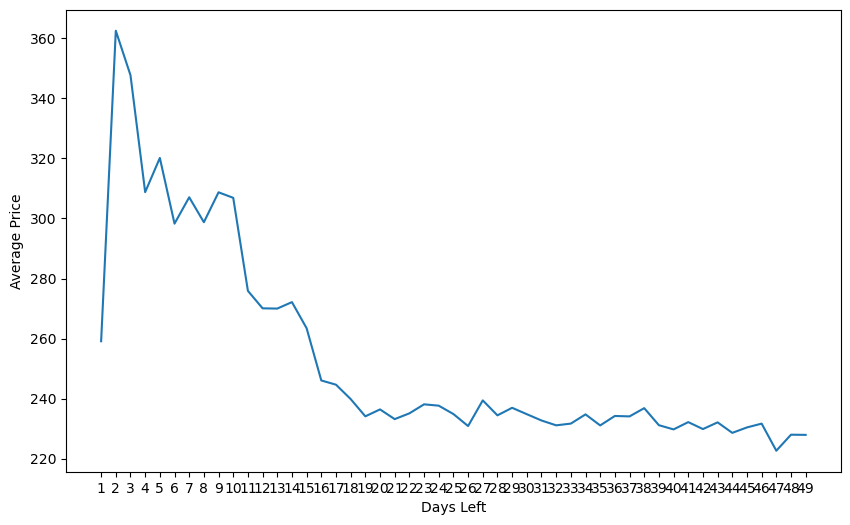

In [26]:
tick_locations = Days_Departure_df['days_left'].unique()

average_price_per_day = Days_Departure_df.groupby('days_left')['price_USD'].mean()
#print(average_price_per_day)
average_price_per_day.plot(kind='line', figsize =(10,6))
plt.xticks(tick_locations)
plt.xlabel("Days Left")
plt.ylabel("Average Price")
#add ticks
plt.show()

# **Which was the most popular airlines used to purchase tickets **

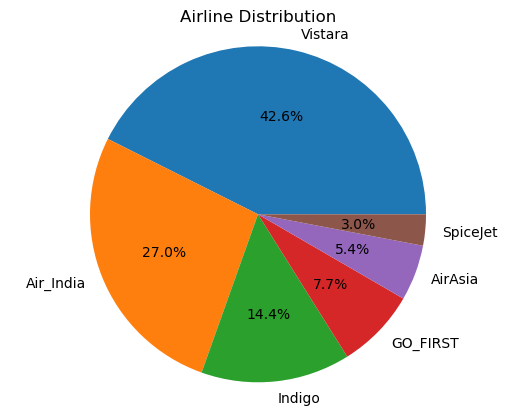

In [17]:
airline_counts = Days_Departure_df['airline'].value_counts()
plt.pie(airline_counts, labels=airline_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Airline Distribution')
plt.show()

# **Linear Regression**

The r-value is: -0.09
y = -1.85x + 298.70


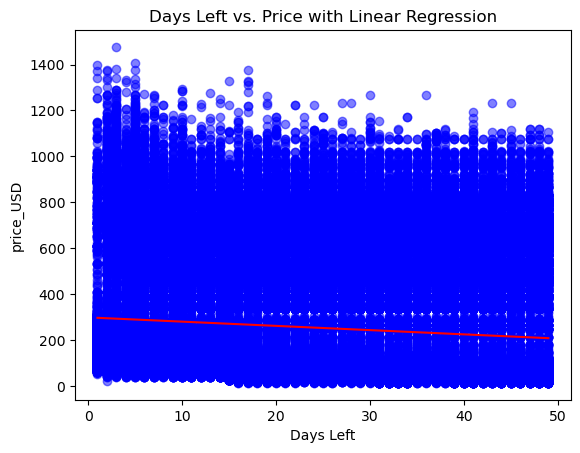

In [18]:
x = Days_Departure_df['days_left']
y = Days_Departure_df['price_USD']
plt.scatter(x, y, color='blue', alpha=0.5)

# Fit a linear regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept

plt.plot(x, line, color='red')
plt.title('Days Left vs. Price with Linear Regression')
plt.xlabel('Days Left')
plt.ylabel('price_USD')

print(f"The r-value is: {r_value:.2f}")
equation = f'y = {slope:.2f}x + {intercept:.2f}'
print(equation)

plt.show()